<a href="https://colab.research.google.com/github/elmaazouziyassine/Machine_Learning_Python/blob/master/0_Data_PreProcessing/Data_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data PreProcessing**

**Steps** :

1. Import libraries.
2. Import datasets. 
3. Explore Data.
4. Separate Features Variables from Target Variable.
5. Handle missing numerical values.
6. Encode categorical data.
7. Split Dataset into Training Set and Test Set. 
8. Feature Scaling.



### **1. Import the required libraries**



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### **2. Import datasets**



In [60]:
## Import data from github
dataset = 'https://raw.githubusercontent.com/elmaazouziyassine/Machine_Learning_Python/master/0_Data_PreProcessing/data.csv'
data = pd.read_csv(dataset)
data.head()

,Country,Age,Salary,Purchased
0,France,44,"72,000",No
1,Morocco,27,"48,000",Yes
2,Germany,30,"54,000",No
3,Morocco,38,"61,000",No
4,Germany,40,nan,Yes


In [87]:
## Change the format of 'Salary Column' from Double to Integer 
pd.options.display.float_format = '{:,.0f}'.format
data.head()

,Country,Age,Salary,Purchased
0,France,44,"72,000",No
1,Morocco,27,"48,000",Yes
2,Germany,30,"54,000",No
3,Morocco,38,"61,000",No
4,Germany,40,nan,Yes


### **3. Explore data**


**3.1. Understand Categorical Data**



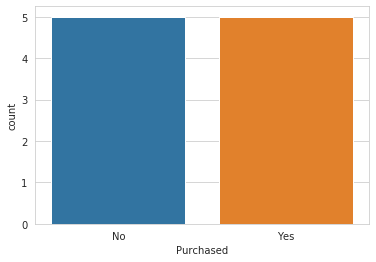

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=data)

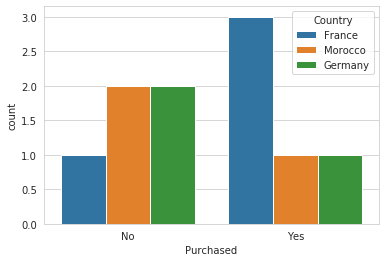

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased', hue='Country', data=data)

### **4. Separate Features Variables from Target Variable**




- Feature Variables has to be stored in a MATRIX
- Target Variable has to be stored in a VECTOR



In [74]:
# Matrix for Feature Variables
X = data.iloc[:, :-1].values

# Vector for Target Variable
y = data.iloc[:, -1].values

X, y

(array([['France', 44.0, 72000.0],
        ['Morocco', 27.0, 48000.0],
        ['Germany', 30.0, 54000.0],
        ['Morocco', 38.0, 61000.0],
        ['Germany', 40.0, nan],
        ['France', 35.0, 58000.0],
        ['Morocco', nan, 52000.0],
        ['France', 48.0, 79000.0],
        ['Germany', 50.0, 83000.0],
        ['France', 37.0, 67000.0]], dtype=object),
 array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
       dtype=object))

### **5. Handle missing values for Numerical Data**

##### **5.1. Create Heat maps to detect missing values**




In [7]:
data.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


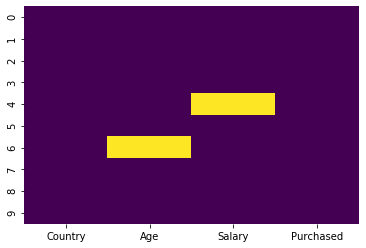

In [22]:
sns.heatmap(data.isnull(), yticklabels=True, cbar=False, cmap='viridis')

##### **5.2. Choose the best strategy for missing values**
Here, we choose to replace missing values buy the "mean" value of the associated column.


In [0]:
from sklearn.impute import SimpleImputer 
# create the imputer object from the class SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(X[:, 1:3])  # Give only the numerical columns (here : age and salary)
X[:, 1:3]=imputer.transform(X[:, 1:3])

**5.3. Check the results**


In [76]:
X, y

(array([['France', 44.0, 72000.0],
        ['Morocco', 27.0, 48000.0],
        ['Germany', 30.0, 54000.0],
        ['Morocco', 38.0, 61000.0],
        ['Germany', 40.0, 63777.77777777778],
        ['France', 35.0, 58000.0],
        ['Morocco', 38.77777777777778, 52000.0],
        ['France', 48.0, 79000.0],
        ['Germany', 50.0, 83000.0],
        ['France', 37.0, 67000.0]], dtype=object),
 array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
       dtype=object))

### **6. Encode Categorical Data**


In [77]:
# Encode "Country" variable 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print('--- X ---')
print(X)

print('--- LabelEncoder ---')
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
print(X)

print('--- OneHotEncoder ---')
ct = ColumnTransformer([('Country', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X) #.toarray()
print(X)

--- X ---
[['France' 44.0 72000.0]
 ['Morocco' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Morocco' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Morocco' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
--- LabelEncoder ---
[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]
--- OneHotEncoder ---
[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [78]:
# Encode "Purchased" variable 
from sklearn.preprocessing import OneHotEncoder

print('--- y ---')
print(y)

print('--- LabelEncoder ---')
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

--- y ---
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
--- LabelEncoder ---
[0 1 0 0 1 1 0 1 0 1]


### **7. Split the Dataset into Training Set and Test Set**

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) # 20% of data for test
X_train 

array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

### **8. Apply Feature Scaling**

In [82]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)
X_train, X_test

(array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
        [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
        [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
        [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
        [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
        [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
        [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
        [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]]),
 array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
        [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]]),
 array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1]))